# Read and Parse Chainer logs

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
batch_pattern = re.compile(r"^#\s+Minibatch-size:\s*(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [4]:
!ls *.log

V100_series_run.log
chainer_timings_K80_b128e1.log
chainer_timings_k80_b64e1.log
chainer_timings_mouse_b128e1.log
chainer_timings_mouse_b64e1.log
chainer_timings_mouse_b64e1_2.log
chainer_timings_mouse_convert_b128e1.log
chainer_timings_mouse_convert_b32e1.log
chainer_timings_mouse_convert_b64e1.log
chainer_timings_mouse_cuda_b64e1.log
chainer_timings_mouse_update_b64e1.log
cupy_logs064.log
cupy_logs128.log
deterministic-nondeterministic.log
mouse_series_run.log


## Deterministic vs non-Deterministic CIFAR100 runs

In [43]:
with open("deterministic-nondeterministic.log","r") as f:
    lines = f.readlines()
    batch = 0
    epoch = 0
    run = 0
    loss = []
    acc = []
    time = []
    df = pd.DataFrame(data=None,columns=range(1,11))
    for line in lines:
        s = line.strip()
        m = batch_pattern.match(s)        
        if m:
            batch = int(m.group(1))
            run += 1
        else:
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss.append(float(m.group(3)))
                acc.append(float(m.group(5)))
                time.append(float(m.group(6)))
                if epoch == 10:
                    df.loc["loss"+str(run)] = loss
                    df.loc["acc"+str(run)] = acc
                    df.loc["time"+str(run)] = time
                    loss = []
                    acc = []
                    time= []
df

,1,2,3,4,5,6,7,8,9,10
loss1,4.639770,4.791100,4.806330,4.605860,4.330380,4.526420,3.907040,3.835850,3.429770,3.536610
acc1,0.013574,0.017578,0.016894,0.027148,0.037891,0.038574,0.075684,0.109082,0.148633,0.156738
time1,48.367200,96.483600,145.007000,193.923000,242.736000,291.518000,340.583000,389.404000,438.238000,487.319000
loss2,4.666560,4.953120,5.193120,5.107410,4.434190,4.506200,4.256700,4.071600,3.851400,3.328830
acc2,0.009961,0.011035,0.010840,0.016406,0.034082,0.038184,0.061816,0.086133,0.134961,0.174707
time2,49.670400,98.480900,147.299000,196.398000,245.240000,294.103000,343.217000,392.040000,440.894000,489.985000
loss3,4.590510,5.162090,5.404950,5.155330,4.539020,4.742890,4.067860,3.575310,3.325700,3.141910
acc3,0.011523,0.010059,0.013672,0.016894,0.033398,0.046289,0.070312,0.114258,0.156934,0.197949
time3,49.561100,98.323900,147.150000,196.217000,245.077000,293.951000,343.080000,391.941000,440.807000,489.904000
loss4,4.641800,5.037620,5.476960,4.823760,4.423260,4.299090,4.252330,3.944200,3.506040,3.450570


In [50]:
acc_df = df[(df.index.str.contains("acc")) | (df.index.str.contains("loss"))]
acc_df

,1,2,3,4,5,6,7,8,9,10
loss1,4.639770,4.791100,4.806330,4.605860,4.330380,4.526420,3.907040,3.835850,3.429770,3.536610
acc1,0.013574,0.017578,0.016894,0.027148,0.037891,0.038574,0.075684,0.109082,0.148633,0.156738
loss2,4.666560,4.953120,5.193120,5.107410,4.434190,4.506200,4.256700,4.071600,3.851400,3.328830
acc2,0.009961,0.011035,0.010840,0.016406,0.034082,0.038184,0.061816,0.086133,0.134961,0.174707
loss3,4.590510,5.162090,5.404950,5.155330,4.539020,4.742890,4.067860,3.575310,3.325700,3.141910
acc3,0.011523,0.010059,0.013672,0.016894,0.033398,0.046289,0.070312,0.114258,0.156934,0.197949
loss4,4.641800,5.037620,5.476960,4.823760,4.423260,4.299090,4.252330,3.944200,3.506040,3.450570
acc4,0.009961,0.010840,0.011719,0.018848,0.036328,0.052441,0.065527,0.093457,0.139746,0.167578
loss5,4.937060,5.391550,4.846560,4.566900,4.434640,4.274660,3.862240,3.629470,3.194900,3.471500
acc5,0.011230,0.010156,0.014356,0.031055,0.036914,0.050293,0.090625,0.113379,0.193359,0.172070


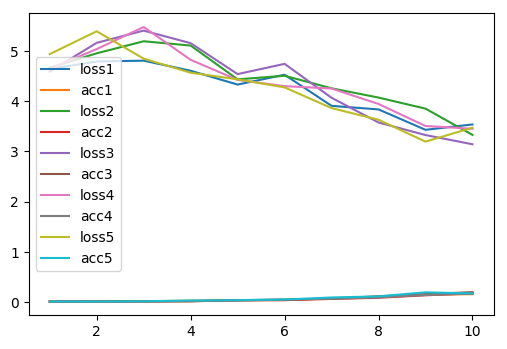

In [51]:
acc_df[:10].T.plot()

In [52]:
df_10 = df.loc[:,10]
df_10

loss1       3.536610
acc1        0.156738
time1     487.319000
loss2       3.328830
acc2        0.174707
time2     489.985000
loss3       3.141910
acc3        0.197949
time3     489.904000
loss4       3.450570
acc4        0.167578
time4     490.051000
loss5       3.471500
acc5        0.172070
time5     489.926000
loss6       3.324110
acc6        0.164746
time6     500.255000
loss7       3.324110
acc7        0.164746
time7     499.772000
loss8       3.324110
acc8        0.164746
time8     499.891000
loss9       3.324110
acc9        0.164746
time9     499.974000
loss10      3.324110
acc10       0.164746
time10    499.719000
Name: 10, dtype: float64

In [83]:
last_acc = df_10[df_10.index.str.contains("acc")]
last_loss = df_10[df_10.index.str.contains("loss")]
# acc = last_acc[:5].as_matrix()
# loss = last_loss[:5].as_matrix()
# print acc
# print loss
# arr = np.vstack((acc,loss))
# print arr

In [100]:
print last_acc[:5].describe()
print last_acc[:5].median()
print last_acc[:5].mean()
print last_loss.describe()
print last_loss.median()

count    5.000000
mean     0.173808
std      0.015139
min      0.156738
25%      0.167578
50%      0.172070
75%      0.174707
max      0.197949
Name: 10, dtype: float64
0.17207
0.1738084
count    10.000000
mean      3.354997
std       0.108807
min       3.141910
25%       3.324110
50%       3.324110
75%       3.420135
max       3.536610
Name: 10, dtype: float64
3.32411


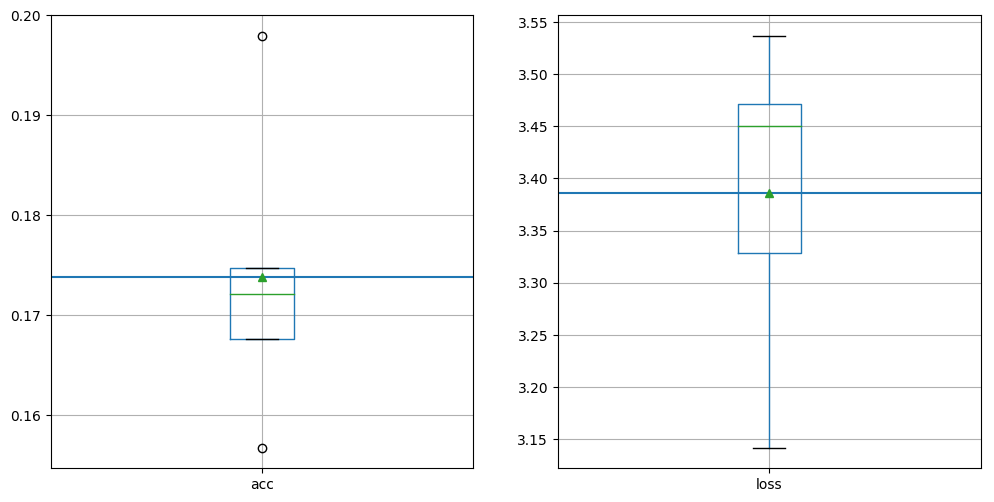

In [101]:
fig, axarr = plt.subplots(1,2,figsize=(12, 6))
last_acc[:5].plot.box(ax=axarr[0],label="acc",showmeans=True,grid=True)
axarr[0].axhline(y=last_acc[:5].mean())
last_loss[:5].plot.box(ax=axarr[1],label="loss",showmeans=True,grid=True)
axarr[1].axhline(y=last_loss[:5].mean())